# Version three of the assignment

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import TensorFlow
import tensorflow as tf

# Import Numpy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [26]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# Importing the CIFAR-10 dataset from Keras 
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [27]:
print(f"X Train Size: {len(X_train)}\n X Test Size: {len(X_test)}" )

X Train Size: 50000
 X Test Size: 10000


In [28]:
# Print a sample from X_test dataset
print(X_test[42]) #Pixel Values

[[[149 149 150]
  [149 149 146]
  [140 140 139]
  ...
  [175 147 171]
  [165 149 164]
  [167 160 173]]

 [[147 147 147]
  [150 150 147]
  [140 140 140]
  ...
  [192 150 176]
  [183 146 166]
  [163 149 158]]

 [[149 149 149]
  [154 154 151]
  [142 142 142]
  ...
  [193 138 162]
  [200 149 170]
  [193 168 178]]

 ...

 [[117 125 136]
  [ 87  91 108]
  [ 65  61  74]
  ...
  [ 50  21  33]
  [ 19  16  19]
  [ 16  19  21]]

 [[125 136 144]
  [110 116 133]
  [ 69  67  83]
  ...
  [ 58  24  38]
  [ 18  16  19]
  [ 16  19  20]]

 [[152 166 172]
  [120 128 145]
  [ 69  69  87]
  ...
  [ 68  37  50]
  [ 15  16  18]
  [ 15  19  20]]]


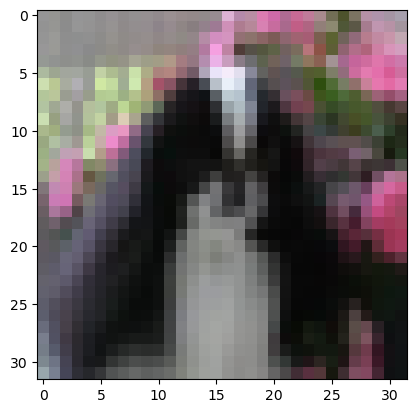

(32, 32, 3)

In [29]:
# Use the .imshow() function and show the plot
plt.imshow(X_test[42])
plt.show()
# Print the shape of the sample image
X_test[42].shape # RGB images have 3 channels 

In [30]:
# Create the validation datasets 
# and assign the last 10000 images of X_train and y_train
X_val = X_train[40000:]
y_val = y_train[40000:]
# Create new train datasets
# and assign the first 40000 images of X_train and y_train
X_train = X_train[:40000]
y_train = y_train[:40000]

In [31]:
# Print the lengths of the each dataset
print("X Train Length:", len(X_train))
print("X Test Length:", len(X_test))
print("X Val Length:", len(X_val))
print("Y Train Length:", len(y_train))
print("Y Test Length:", len(y_test))
print("Y Val Length:", len(y_val))

X Train Length: 40000
X Test Length: 10000
X Val Length: 10000
Y Train Length: 40000
Y Test Length: 10000
Y Val Length: 10000


In [32]:
# Divide each dataset by 255 RGB color 256
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

In [33]:
# Create a model object
model = tf.keras.Sequential()

In [34]:
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add( tf.keras.layers.Dropout(0.20))

model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add( tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add( tf.keras.layers.Dropout(0.35))

In [35]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add( tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2048, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add( tf.keras.layers.Dropout(0.5))

In [36]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [37]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [38]:
# Train the model for 80 epochs 
results = model.fit(X_train, y_train, epochs=90,
                    validation_data=(X_val, y_val))

Epoch 1/90
1250/1250 [==============================] - 42s 32ms/step - loss: 2.2106 - accuracy: 0.3521 - val_loss: 2.3216 - val_accuracy: 0.4327
Epoch 2/90
1250/1250 [==============================] - 53s 42ms/step - loss: 1.5241 - accuracy: 0.5207 - val_loss: 1.4800 - val_accuracy: 0.5693
Epoch 3/90
1250/1250 [==============================] - 51s 41ms/step - loss: 1.1269 - accuracy: 0.6322 - val_loss: 1.2083 - val_accuracy: 0.6228
Epoch 4/90
1250/1250 [==============================] - 49s 39ms/step - loss: 0.9242 - accuracy: 0.6939 - val_loss: 1.0700 - val_accuracy: 0.6447
Epoch 5/90
1250/1250 [==============================] - 48s 39ms/step - loss: 0.8460 - accuracy: 0.7223 - val_loss: 2.5003 - val_accuracy: 0.6843
Epoch 6/90
1250/1250 [==============================] - 53s 42ms/step - loss: 0.7016 - accuracy: 0.7669 - val_loss: 0.8265 - val_accuracy: 0.7674
Epoch 7/90
1250/1250 [==============================] - 50s 40ms/step - loss: 0.6410 - accuracy: 0.7862 - val_loss: 1.1769 -

Epoch 57/90
1250/1250 [==============================] - 52s 42ms/step - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.7650 - val_accuracy: 0.8574
Epoch 58/90
1250/1250 [==============================] - 52s 42ms/step - loss: 0.0322 - accuracy: 0.9891 - val_loss: 0.7912 - val_accuracy: 0.8552
Epoch 59/90
1250/1250 [==============================] - 56s 44ms/step - loss: 0.0387 - accuracy: 0.9878 - val_loss: 0.8083 - val_accuracy: 0.8493
Epoch 60/90
1250/1250 [==============================] - 55s 44ms/step - loss: 0.0332 - accuracy: 0.9893 - val_loss: 0.7923 - val_accuracy: 0.8550
Epoch 61/90
1250/1250 [==============================] - 56s 45ms/step - loss: 0.0368 - accuracy: 0.9880 - val_loss: 0.9297 - val_accuracy: 0.8467
Epoch 62/90
1250/1250 [==============================] - 54s 43ms/step - loss: 0.0344 - accuracy: 0.9894 - val_loss: 0.8150 - val_accuracy: 0.8542
Epoch 63/90
1250/1250 [==============================] - 54s 43ms/step - loss: 0.0334 - accuracy: 0.9890 - val_loss: 0

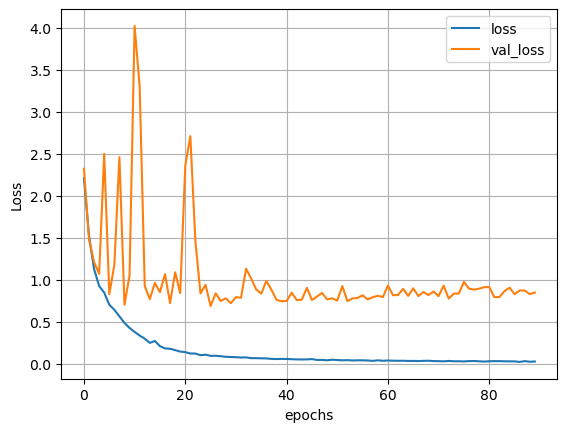

In [39]:
# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("epochs")
plt.ylabel("Loss")
# Put legend table
plt.legend()
plt.grid()
# Show the plot
plt.show()

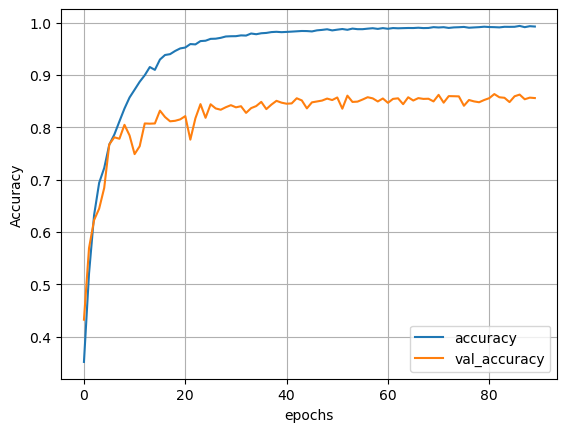

In [40]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")

# Name the x and y axises
plt.xlabel("epochs")
plt.ylabel("Accuracy")
# Put legend table
plt.legend()
plt.grid()
# Show the plot
plt.show()

In [41]:
# Evaluate the performance
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.8773 - accuracy: 0.8558


[0.8772876858711243, 0.8557999730110168]

In [42]:
# Make prediction on the reshaped sample
predict_result = model.predict(X_test[42].reshape(1,32,32,3))
# Print the prediction result
print(predict_result)
# Find the predicted class
predict_class = predict_result.argmax()
# Find the prediction probability
predict_prob = predict_result.max()

1/1 [==============================] - 0s 386ms/step
[[3.6434798e-05 1.3192160e-05 3.3174891e-02 9.2372411e-06 7.7645999e-04
  9.6189672e-01 6.0114483e-11 4.0791775e-03 2.7671422e-06 1.1245812e-05]]


In [43]:
# Print the results
print(f"Image belongs to class: {predict_class}\n Prob is: {predict_prob}")

Image belongs to class: 5
 Prob is: 0.9618967175483704


313/313 [==============================] - 2s 7ms/step


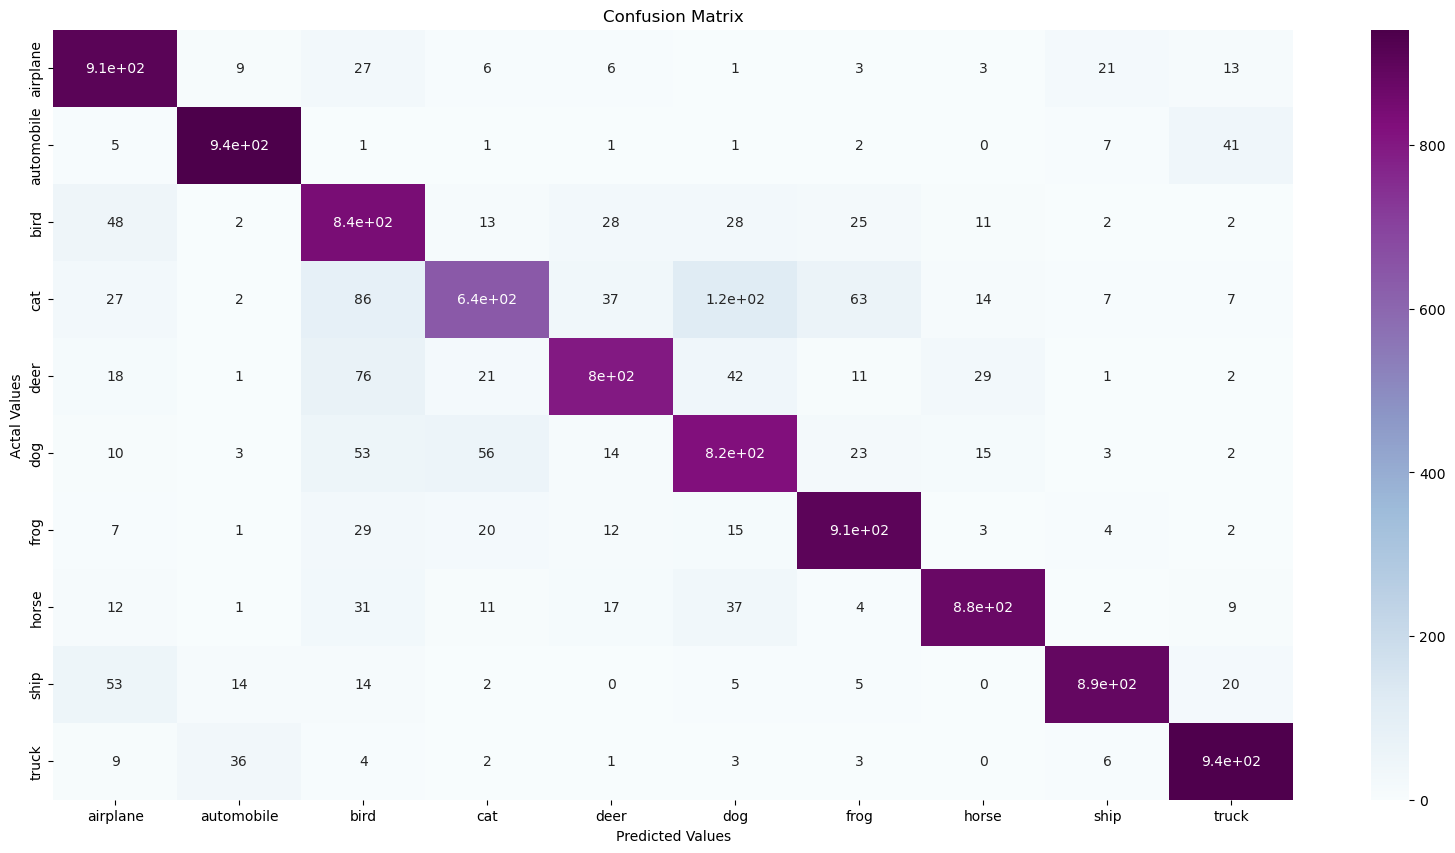

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

y_preds = model.predict(X_test)
y_pred=y_preds.argmax(axis=1)
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,index=class_names,
       columns=class_names)
plt.figure(figsize=(20,10))
sns.heatmap(cm_df, annot=True,cmap='BuPu')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [45]:
##########################################################
# MULTI-CLASS CONFUSION MATRIX FOR EACH CLASS
##########################################################
from sklearn.metrics import multilabel_confusion_matrix
from math import sqrt

# Actual and predicted classes
lst_actual_class = y_test
lst_predicted_class = y_pred

# Class = Label 0 to 9
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Compute multi-class confusion matrix
arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=class_names)

# Temp store results
store_sens = [];
store_spec = [];
store_acc = [];
store_bal_acc = [];
store_prec = [];
store_fscore = [];
store_mcc = [];
for no_class in range(len(class_names)):
    arr_data = arr_out_matrix[no_class];
    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    x = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(x), 3)
    store_sens.append(sensitivity);
    store_spec.append(specificity);
    store_acc.append(accuracy);
    store_bal_acc.append(balanced_accuracy);
    store_prec.append(precision);
    store_fscore.append(f1Score);
    store_mcc.append(MCC);

In [46]:
df1=pd.DataFrame(cm)
df1

,0,1,2,3,4,5,6,7,8,9
0,911,9,27,6,6,1,3,3,21,13
1,5,941,1,1,1,1,2,0,7,41
2,48,2,841,13,28,28,25,11,2,2
3,27,2,86,639,37,118,63,14,7,7
4,18,1,76,21,799,42,11,29,1,2
5,10,3,53,56,14,821,23,15,3,2
6,7,1,29,20,12,15,907,3,4,2
7,12,1,31,11,17,37,4,876,2,9
8,53,14,14,2,0,5,5,0,887,20
9,9,36,4,2,1,3,3,0,6,936


In [47]:
df=pd.DataFrame(arr_out_matrix.reshape(10,-1), columns=["TN","FP","FN","TP"])
df['Recall'] = df.TP/(df.TP+df.FN)
df['Accuracy'] = (df.TP+df.TN)/(df.TN+df.FP+df.FN+df.TP)
df['Precision'] = (df.TP)/(df.FP+df.TP)
df['F1']=2*df.Recall*df.Precision/(df.Recall+df.Precision)
df

,TN,FP,FN,TP,Recall,Accuracy,Precision,F1
0,8811,189,89,911,0.911,0.9722,0.828182,0.867619
1,8931,69,59,941,0.941,0.9872,0.931683,0.936318
2,8679,321,159,841,0.841,0.9520,0.723752,0.777983
3,8868,132,361,639,0.639,0.9507,0.828794,0.721626
4,8884,116,201,799,0.799,0.9683,0.873224,0.834465
5,8750,250,179,821,0.821,0.9571,0.766573,0.792854
6,8861,139,93,907,0.907,0.9768,0.867113,0.886608
7,8925,75,124,876,0.876,0.9801,0.921136,0.898001
8,8947,53,113,887,0.887,0.9834,0.943617,0.914433
9,8902,98,64,936,0.936,0.9838,0.905222,0.920354


In [48]:
##########################################################
# OVERALL - FINAL PERFORMANCE PREDICTION 
##########################################################
from statistics import mean
print("Overall Performance Prediction:");
print("Sensitivity: {0}%".format(round(mean(store_sens)*100, 4)));
print("Specificity: {0}%".format(round(mean(store_spec)*100, 4)));
print("Accuracy: {0}%".format(round(mean(store_acc)*100, 4)));
print("Balanced Accuracy: {0}%".format(round(mean(store_bal_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(store_prec)*100, 4)));
print("F1-Score: {0}%".format(round(mean(store_fscore)*100, 4)))
print("MCC: {0}\n".format(round(mean(store_mcc), 4)))

Overall Performance Prediction:
Sensitivity: 85.58%
Specificity: 98.39%
Accuracy: 97.11%
Balanced Accuracy: 91.96%
Precision: 85.9%
F1-Score: 85.5%
MCC: 0.8404

